<a href="https://colab.research.google.com/github/maritamayo25/Business-Analytics/blob/main/Reto_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelo KNN - key nearest neighbor**
0. cargar librerias

In [ ]:
import numpy as np                             #funciones matemáticas
import matplotlib.pyplot as plt                #para graficas
import pandas as pd                            #conexión con excel
import seaborn as sns                          #para graficar distribuciones estadísticas

from sklearn.neighbors import KNeighborsClassifier       #KNN
from sklearn.metrics import confusion_matrix             #matriz de confusión
from sklearn.cluster import KMeans                       #Motoncitos de datos



1. Se cargan los datos

<Figure size 1000x1000 with 0 Axes>

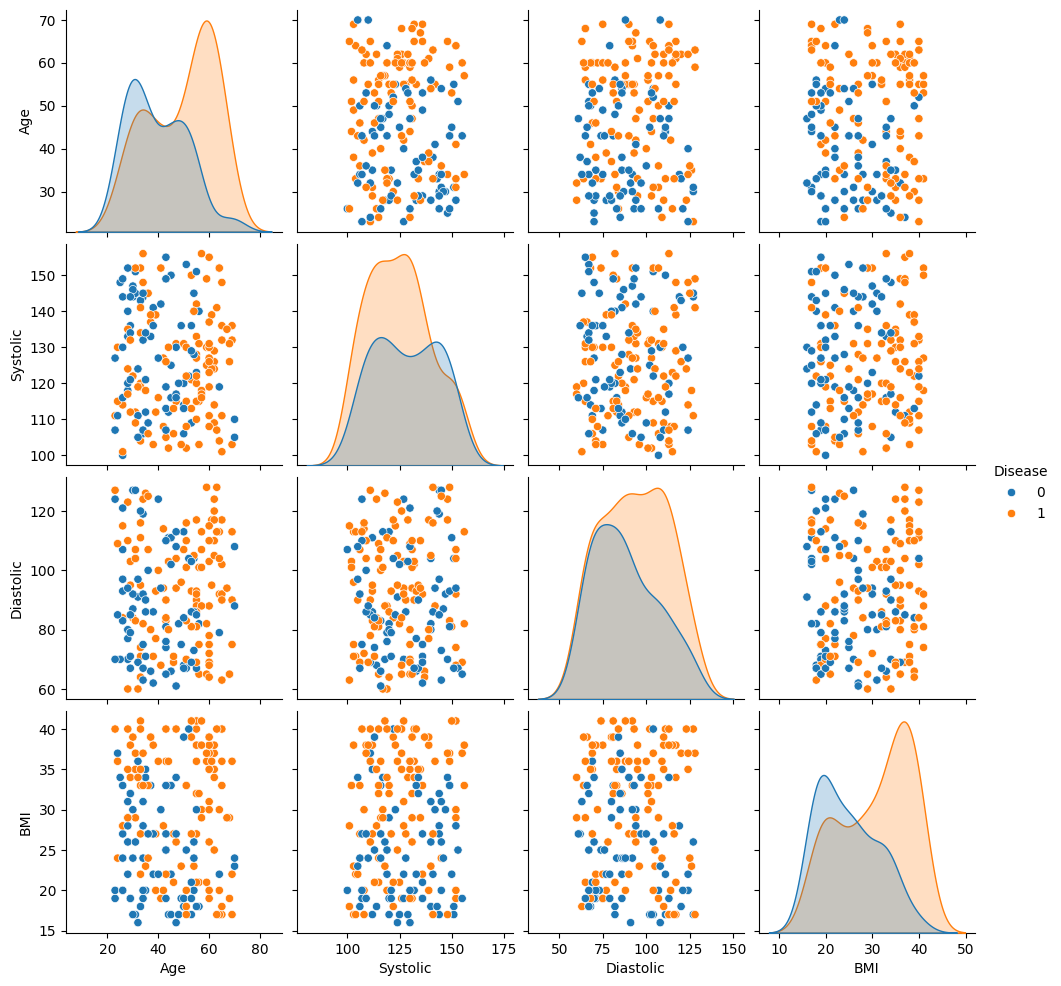

,Age,Systolic,Diastolic,BMI,Disease
Age,1.000000,-0.047693,-0.001494,-0.005604,0.356533
Systolic,-0.047693,1.000000,-0.008109,0.011938,-0.111110
Diastolic,-0.001494,-0.008109,1.000000,0.003735,0.142679
BMI,-0.005604,0.011938,0.003735,1.000000,0.382232
Disease,0.356533,-0.111110,0.142679,0.382232,1.000000


In [ ]:
nxl='/content/3. BD2-HeartData_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()
XDB.head(5)
#1 se selecciona las variables de interés
XDB=XDB [[ 'Age', 'Systolic', 'Diastolic','BMI','Disease']]
#2determinar la correlación entre las variables y su impacto sobre la variable de salida

plt.figure (figsize=(10,10))
sns.pairplot(XDB,hue='Disease')
plt.show()

#los azules personas que no tienen enfermedades, naranjados personas que si tienen enfermedades
#cuando tienen forma de cono es porque estan muy corelacionadas

#La correlación numérica es
XDB.corr()



2.Se procede con la implementación del modelo KNN

La matriz de confusión es:
: [[55 18]
 [29 78]]
La exactitud es: 0.7388888888888889
La sensibilidad es: 0.7289719626168224
La especificidad es: 0.7534246575342466
El paciente es: [0]


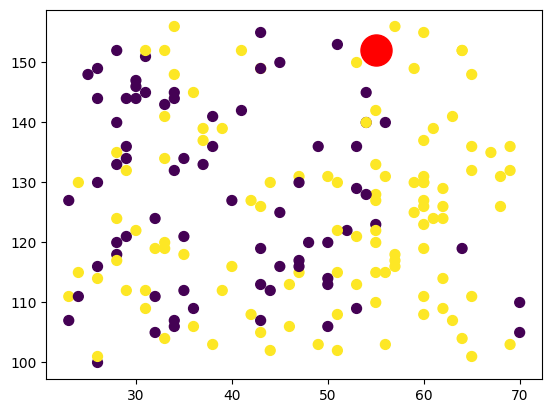

In [ ]:
#1 construimos el modelo KNN
XD=np.array(XDB[['Age', 'Systolic', 'Diastolic','BMI']]) #Variables de entrada
yd=np.array(XDB['Disease'])                                                #Variables de salida

knn=KNeighborsClassifier(n_neighbors=10)                                  #Evaluame frente a 10 vecinos
knn.fit(XD,yd)

ydp=knn.predict(XD)
#Evaluamos el modelo KNN
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n:", cm)
VN=cm[0,0];FP=cm[0,1]
FN=cm[1,0]; VP=cm[1,1]

Exactitud=(VP+VN)/(VN+FP+FN+VP)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(FP+VN)
print("La exactitud es:",Exactitud)
print("La sensibilidad es:",Sensibilidad)
print("La especificidad es:",Especificidad)

#3 Evakuamos un paciente o pacienta
XDp=np.array([[55,152,92,22]])
ydpp=knn.predict(XDp)
print("El paciente es:",ydpp)

#Donde se encuentra el paciente
plt.figure()
plt.scatter(XD[:,0],XD[:,1],c=yd, s=50, cmap='viridis')
plt.scatter(XDp[:,0],XDp[:,1],marker='o', s=500, facecolors='red')
plt.show()

**Modelo Kmeans**

1.Se procede con la implementación del modelo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Los centroides son los siguientes:
 [[ 46.70588235 139.14705882 112.35294118  27.32352941]
 [ 45.67567568 112.08108108 110.08108108  28.45945946]
 [ 38.51351351 143.24324324  78.21621622  29.        ]
 [ 58.475      121.7         79.575       29.05      ]
 [ 35.21875    114.875       77.125       27.90625   ]]


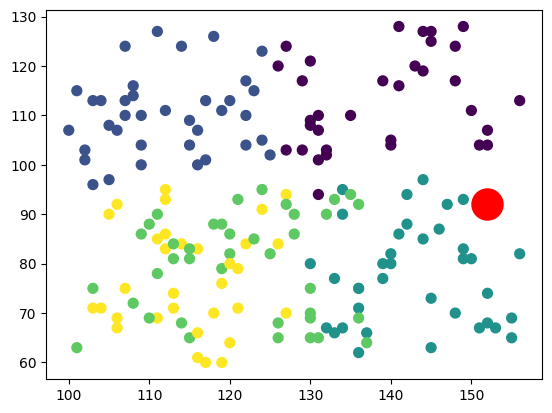

La matriz de confusión es:
: [[11 11 25  9 17]
 [23 26 12 31 15]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
La exactitud es: 0.5211267605633803
La sensibilidad es: 0.5306122448979592
La especificidad es: 0.5
El paciente pertenece al grupo: [2]


In [ ]:
from time import mktime
np.random.seed(42)  #vamos a tomar las mismas semillas

#1 construimos la estructura del modelo
k=5 #5 montoncitos de datos
mkm=KMeans(n_clusters=k,init='random',random_state=42)
mkm.fit(XD,yd)
labels=mkm.labels_

centroids=mkm.cluster_centers_
print("Los centroides son los siguientes:\n", centroids)
plt.figure()
plt.scatter(XD[:,1],XD[:,2],c=mkm.labels_, s=50, cmap='viridis')
#esta gráfica me permite agrupar los datos por colores
plt.scatter(XDp[:,1],XDp[:,2],marker='o', s=500, facecolors='red')#graficar el paciente
plt.show()

ydp=mkm.predict(XD)
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n:", cm)
VN=cm[0,0];FP=cm[0,1]
FN=cm[1,0]; VP=cm[1,1]

Exactitud=(VP+VN)/(VN+FP+FN+VP)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(FP+VN)
print("La exactitud es:",Exactitud)
print("La sensibilidad es:",Sensibilidad)
print("La especificidad es:",Especificidad)


ydpkm=mkm.predict(XDp)
print("El paciente pertenece al grupo:",ydpkm)



2. se procede con la caracterización de cada cluster
número de personas del cluster

*   número de personas del cluster
*   número de personas con enfermedad cardiaca por cluster
*   número de personas que no tienen enfermedad cardiaca por cluster

In [ ]:
labels=mkm.labels_
print("Los labels son:\n", labels) #Esto indica el lugar en el que cayó cada persona

counts_1=np.bincount(labels)
print("Los conteos son:\n", counts_1)

C01=len(np.where((labels==0)& (yd==1))[0]) #digame cuantos son los que tienen enfermedades cardiacas del cluster cero
C00=len(np.where((labels==0)& (yd==0))[0]) #digame cuantos son los que no tienen enfermedades cardiacas del cluster cero

print("Las personas del cluster cero que tienen enfermedades cardiacas son: ", C01/(C00+C01))
print("Las personas del cluster cero que no tienen enfermedades cardiacas son: ", C00/(C00+C01))

C11=len(np.where((labels==1)& (yd==1))[0]) #digame cuantos son los que tienen enfermedades cardiacas del primer cluster
C10=len(np.where((labels==1)& (yd==0))[0]) #digame cuantos son los que no tienen enfermedades cardiacas del primer cluster

print("Las personas del primer cluster que tienen enfermedades cardiacas son: ", C11/(C10+C11))
print("Las personas del primer cluster que no tienen enfermedades cardiacas son: ", C10/(C10+C11))

C21=len(np.where((labels==2)& (yd==1))[0]) #digame cuantos son los que tienen enfermedades cardiacas del Segundo cluster
C20=len(np.where((labels==2)& (yd==0))[0]) #digame cuantos son los que no tienen enfermedades cardiacas del segundo cluster


print("Las personas del Segundo cluster que tienen enfermedades cardiacas son: ", C21/(C20+C21))
print("Las personas del Segundo cluster que no tienen enfermedades cardiacas son: ", C20/(C20+C21))

C31=len(np.where((labels==3)& (yd==1))[0]) #digame cuantos son los que tienen enfermedades cardiacas del tercer cluster
C30=len(np.where((labels==3)& (yd==0))[0]) #digame cuantos son los que no tienen enfermedades cardiacas del tercer cluster


print("Las personas del Tercero cluster que tienen enfermedades cardiacas son: ", C31/(C30+C31))
print("Las personas del Tercero cluster que no tienen enfermedades cardiacas son: ", C30/(C30+C31))

C41=len(np.where((labels==4)& (yd==1))[0]) #digame cuantos son los que tienen enfermedades cardiacas del cuarto cluster
C40=len(np.where((labels==4)& (yd==0))[0]) #digame cuantos son los que no tienen enfermedades cardiacas del cuarto cluster


print("Las personas del cuarto cluster que tienen enfermedades cardiacas son: ", C41/(C40+C41))
print("Las personas del cuarto cluster que no tienen enfermedades cardiacas son: ", C40/(C40+C41))




Los labels son:
 [1 3 0 0 0 2 0 3 2 0 4 0 2 4 0 4 4 2 3 2 0 4 4 2 2 0 2 2 2 3 2 1 3 2 0 3 3
 4 0 1 1 2 3 4 4 2 0 4 2 3 4 0 3 0 4 2 4 1 4 2 1 3 1 1 4 1 1 4 3 4 2 1 3 3
 4 3 0 3 1 0 4 2 4 3 3 3 1 3 3 2 0 1 1 2 3 0 4 3 2 0 1 1 0 4 1 0 3 0 3 2 0
 1 2 2 1 4 3 2 1 0 1 1 3 1 1 0 2 3 1 1 3 3 2 3 2 3 2 3 4 3 1 1 3 3 1 3 4 2
 3 2 2 1 3 0 4 2 1 0 4 1 0 0 1 0 4 1 0 0 4 2 0 2 0 4 1 4 1 4 3 2]
Los conteos son:
 [34 37 37 40 32]
Las personas del cluster cero que tienen enfermedades cardiacas son:  0.6764705882352942
Las personas del cluster cero que no tienen enfermedades cardiacas son:  0.3235294117647059
Las personas del primer cluster que tienen enfermedades cardiacas son:  0.7027027027027027
Las personas del primer cluster que no tienen enfermedades cardiacas son:  0.2972972972972973
Las personas del Segundo cluster que tienen enfermedades cardiacas son:  0.32432432432432434
Las personas del Segundo cluster que no tienen enfermedades cardiacas son:  0.6756756756756757
Las personas del Tercero clu

**Análisis**

En la base de datos se puede observar un total de 180 personas divididos en 107 personas que si tienen enfermedades cardiacas (59%) y 73 personas que no tienen enfermedades cardiacas (41%), De acuerdo con lo anterior, el modelo KNN arrojo un indice de exactitud cercano al 74% así como indices de sensibilidad cercanos al 73% igualmente y que muestran el comportamiento del modelo frente a las personas que tienen enfermedades cardiacas, Este mismo porcentaje en promedio se puede observar frente al indice de especificidad (75%) el cual mide el comportamiento del modelo en la predicción de personas que no tienen enfermedades cardiacas.


Según el modelo KNN no se evidencia alguna variable que tenga una correlación grande con la variable de salida disease, sin embargo, la variable que tiene una mayor correlación es el BMI, con un 38%, seguido de la edad con un 35% de correlación.


el modelo K-MEANS arrojo un indice de exactitud cercano al 52% así como indices de sensibilidad cercanos al 53% igualmente y que muestran el comportamiento del modelo frente a las personas que tienen enfermedades cardiacas, Este mismo porcentaje en promedio se puede observar frente al indice de especificidad (50%) el cual mide el comportamiento del modelo en la predicción de personas que no tienen enfermedades cardiacas.

Se puede decir de este análisis que el cluster 3 es el que presenta mayor edad con un aproximado de 58 años

El que presenta mayor systolic es el cluster 2 con un aproximado de 143mmHg.

El que presenta mayor diastolic es el cluster o con un aproximado de 112mmHg.

El que presenta mayor BMI es el cluster 3 con un aproximado de 29.


